In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
X = data.iloc[:, 1:-1].values
y = pd.factorize(data['Species'])[0]

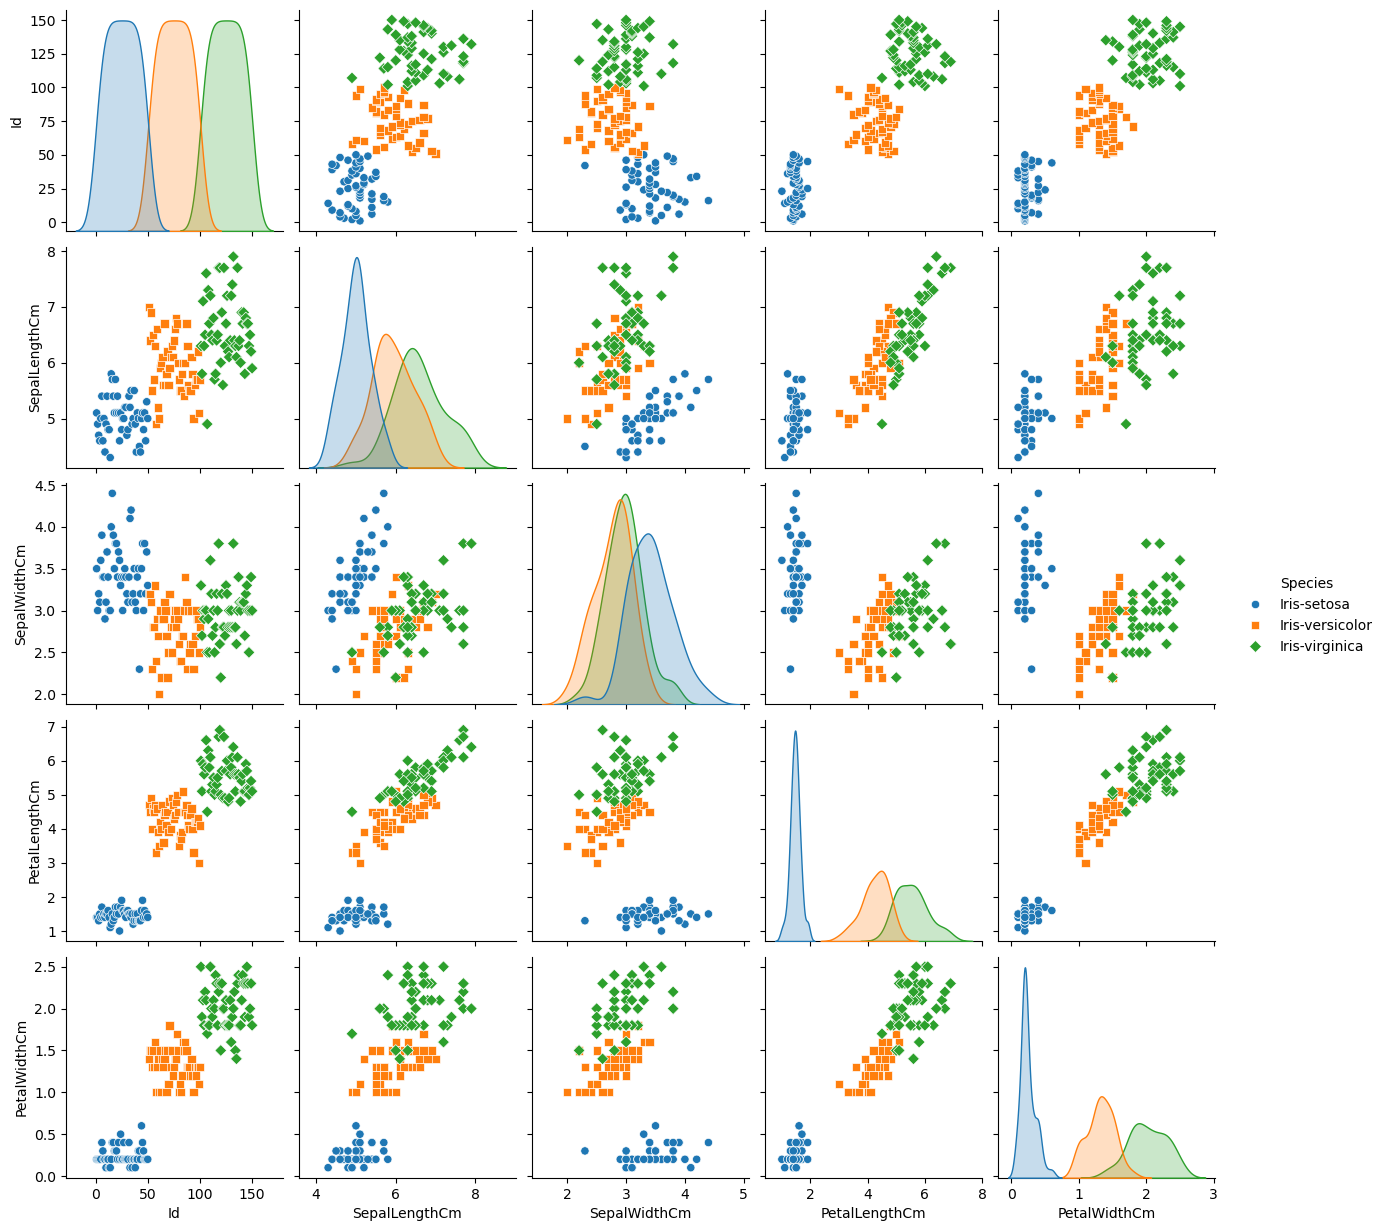

In [4]:
sns.pairplot(data, hue='Species', markers=["o", "s", "D"])
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
y_pred_species = [species_names[i] for i in y_pred]
y_test_species = [species_names[i] for i in y_test]

In [9]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=species_names)

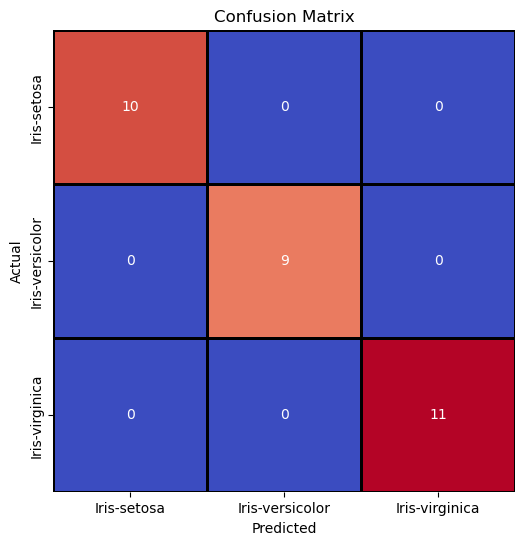

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=species_names, yticklabels=species_names, cbar=False, linewidths=1, linecolor='black', square=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [11]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [15]:
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])
predicted_class = model.predict(new_sample)
predicted_species = species_names[predicted_class[0]]
print(f"Predicted Species: {predicted_species}")

Predicted Species: Iris-setosa
